In [1]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [2]:
class RNNScratch(d2l.Module):  # @save
    """The RNN model implemented from scratch."""

    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W_xh = nn.Parameter(
            torch.randn(num_inputs, num_hiddens) * sigma)
        self.W_hh = nn.Parameter(
            torch.randn(num_hiddens, num_hiddens) * sigma)
        self.b_h = nn.Parameter(torch.zeros(num_hiddens))

In [3]:
@d2l.add_to_class(RNNScratch)  # @save
def forward(self, inputs, state=None):
    if state is None:
        # Initial state with shape: (batch_size, num_hiddens)
        state = torch.zeros((inputs.shape[1], self.num_hiddens),
                            device=inputs.device)
    else:
        state, = state
    outputs = []
    for X in inputs:  # Shape of inputs: (num_steps, batch_size, num_inputs)
        state = torch.tanh(torch.matmul(X, self.W_xh) +
                           torch.matmul(state, self.W_hh) + self.b_h)
        outputs.append(state)
    return outputs, state

这段代码定义了一个名为`forward`的方法，它是`RNNScratch`类的一部分。这个方法负责处理RNN的前向传播。现在，让我们一步一步解释这段代码：

1. 首先，我们检查是否提供了一个初始状态。如果没有提供初始状态（即`state`为`None`），我们将创建一个全零张量作为初始状态。这个张量的形状为`(batch_size, num_hiddens)`，表示批量大小和隐藏状态的维度。

2. 如果提供了一个初始状态，我们使用`state, = state`这行代码将其解包。这里，`state`是一个包含一个元素的元组，这个元素是一个形状为`(batch_size, num_hiddens)`的张量。通过使用逗号和赋值操作，我们将元组中的张量分配给`state`变量。这样做的目的是确保`state`变量始终包含一个形状为`(batch_size, num_hiddens)`的张量，而不是一个元组。

3. 接下来，我们创建一个名为`outputs`的空列表，用于存储每个时间步的输出。

4. 然后，我们遍历输入序列中的每个元素`X`。输入的形状为`(num_steps, batch_size, num_inputs)`，表示时间步数、批量大小和输入维度。

5. 对于每个输入`X`，我们执行以下操作：
   - 计算`X`与权重矩阵`self.W_xh`的乘积。
   - 计算当前隐藏状态`state`与权重矩阵`self.W_hh`的乘积。
   - 将两个乘积相加，并加上偏置`self.b_h`。
   - 将结果通过激活函数`tanh`，得到新的隐藏状态`state`。
   
   这些操作实现了RNN的核心计算，即根据当前输入`X`和先前的隐藏状态`state`来计算新的隐藏状态。

6. 将每个时间步的新隐藏状态`state`添加到`outputs`列表中。

7. 最后，返回`outputs`列表和最终的隐藏状态`state`。这些输出可以用于计算损失函数，并在反向传播过程中更新网络参数。

总之，这段代码实现了一个基本的RNN前向传播过程，包括处理隐藏状态和计算每个时间步的输出。`state, = state`这行代码的目的是确保`state`变量始终包含一个张量，而不是一个元组。

In [4]:
batch_size, num_inputs, num_hiddens, num_steps = 2, 16, 32, 100
rnn = RNNScratch(num_inputs, num_hiddens)
X = torch.ones((num_steps, batch_size, num_inputs))
outputs, state = rnn(X)

在RNN中，批量大小（batch size）是指同时处理的序列样本的数量。这是一个重要概念，因为它允许我们在训练和推理过程中对多个序列样本进行并行处理，从而提高计算效率。

为了更好地理解批量大小，让我们考虑一个具体的例子。假设我们有一个文本数据集，其中包含以下4个句子：

1. "I love deep learning."
2. "Recurrent neural networks are powerful."
3. "Natural language processing is an interesting field."
4. "Machine learning is a popular research area."

现在，我们希望使用RNN对这些句子进行建模。首先，我们需要将这些句子分词（在这个例子中，我们使用单词作为标记）。然后，我们可以将这些句子表示为单词索引序列。为了简化问题，我们可以假设我们已经将每个句子截断或填充为相同的长度，比如6个单词。

接下来，我们需要选择一个批量大小。假设我们选择批量大小为2，这意味着我们将在每个训练迭代中同时处理2个句子。因此，在第一次迭代中，我们可能会处理句子1和句子2；在第二次迭代中，我们可能会处理句子3和句子4。请注意，为了在整个数据集上进行多次迭代，我们通常会对数据进行随机排列。

在每个迭代过程中，我们需要将选定的句子输入到RNN中。在这个例子中，我们的输入张量将具有形状`(num_steps, batch_size, num_inputs)`，其中`num_steps`是时间步数（在这个例子中为6，因为我们的句子长度为6个单词），`batch_size`是批量大小（在这个例子中为2），`num_inputs`是输入维度（例如，如果我们使用单词嵌入，这将是嵌入向量的大小）。

在每个时间步，RNN会处理一个单词，然后更新其隐藏状态。这个过程在所有时间步中进行，直到处理完整个序列。在训练过程中，我们会计算损失函数，并使用梯度下降等优化算法更新RNN的参数。

总之，在RNN中，批量大小是指同时处理的序列样本的数量。通过使用批量大小大于1，我们可以在训练和推理过程中对多个序列样本进行并行处理，从而提高计算效率。

In [5]:
def check_len(a, n):  # @save
    """Check the length of a list."""
    assert len(a) == n, f'list\'s length {len(a)} != expected length {n}'


def check_shape(a, shape):  # @save
    """Check the shape of a tensor."""
    assert a.shape == shape, \
        f'tensor\'s shape {a.shape} != expected shape {shape}'


check_len(outputs, num_steps)
check_shape(outputs[0], (batch_size, num_hiddens))
check_shape(state, (batch_size, num_hiddens))

In [6]:
# RNN-Based Language Model
class RNNLMScratch(d2l.Classifier):  # @save
    """The RNN-based language model implemented from scratch."""

    def __init__(self, rnn, vocab_size, lr=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.init_params()

    def init_params(self):
        self.W_hq = nn.Parameter(
            torch.randn(
                self.rnn.num_hiddens, self.vocab_size) * self.rnn.sigma)
        self.b_q = nn.Parameter(torch.zeros(self.vocab_size))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('ppl', torch.exp(l), train=False)

这是一个名为`RNNLMScratch`的类，它继承了`d2l.Classifier`，并实现了一个基于RNN的语言模型。下面是这个类的逐步解释：

1. `__init__(self, rnn, vocab_size, lr=0.01)`: 这是类的初始化函数，它接收一个RNN对象，词汇表的大小（vocab_size），以及学习率（lr）作为参数。`self.save_hyperparameters()`保存了这些超参数，以便在后续使用。`self.init_params()`被调用来初始化模型的参数。

2. `init_params(self)`: 这个方法被用来初始化模型的参数。`self.W_hq`是一个权重参数，它的形状是`(num_hiddens, vocab_size)`，其中`num_hiddens`是RNN的隐藏单元数量，`vocab_size`是词汇表的大小。这个权重参数被初始化为一个随机张量，元素来自标准正态分布，并乘以`self.rnn.sigma`。`self.b_q`是一个偏置参数，它的形状是`(vocab_size,)`，所有元素被初始化为0。

3. `training_step(self, batch)`: 这个方法定义了模型在训练阶段的一个步骤。该方法接收一个批次的数据，计算模型的输出和损失，并在训练过程中绘制困惑度（perplexity）的变化。困惑度是语言模型常用的评价指标，计算公式为`exp(loss)`。

4. `validation_step(self, batch)`: 这个方法定义了模型在验证阶段的一个步骤。该方法接收一个批次的数据，计算模型的输出和损失，并在验证过程中绘制困惑度的变化。

总的来说，这个类实现了一个基于RNN的语言模型，包括参数的初始化，以及在训练和验证阶段的计算步骤。

`self.W_hq`是一个权重参数，它用于将RNN的隐藏状态映射到词汇表上的概率分布。这个权重矩阵的形状是`(num_hiddens, vocab_size)`，因为我们需要执行以下操作：

1. RNN的隐藏状态具有`num_hiddens`个单元。在每个时间步，RNN都会产生一个形状为`(batch_size, num_hiddens)`的隐藏状态张量。

2. 我们希望将这个隐藏状态映射到一个概率分布，该分布表示生成词汇表中每个单词的概率。因此，我们需要一个形状为`(vocab_size,)`的输出向量。

要从隐藏状态计算这个输出概率分布，我们需要执行一个线性变换。这个线性变换由权重矩阵`self.W_hq`和偏置向量`self.b_q`组成。我们将隐藏状态与权重矩阵相乘，然后加上偏置向量。权重矩阵的形状必须是`(num_hiddens, vocab_size)`，以便我们可以执行矩阵乘法，并得到一个形状为`(batch_size, vocab_size)`的输出张量。这个输出张量表示生成词汇表中每个单词的概率分布。

总之，`self.W_hq`的第一维是`num_hiddens`，因为我们需要将RNN的隐藏状态映射到词汇表上的概率分布。这需要执行一个线性变换，其中权重矩阵的形状为`(num_hiddens, vocab_size)`。

当我们处理词汇表中的标记（可以是单词、字符或词片）时，每个标记都由一个数字索引表示，该数字索引表示对应的单词/字符/词片在词汇表中的位置。你可能会想要构建一个神经网络，每个时间步只有一个输入节点，可以将索引作为标量值输入。这在处理像价格或温度这样的数值输入时是有效的，因为任何两个足够接近的值都应该被类似地处理。但是在处理词汇索引时，这种方法并不合适。例如，词汇表中索引为50和51的单词可能是“their”和“said”，这两个单词的含义并不相似。

当处理这种类型的分类数据时，最常见的策略是使用一种独热编码（one-hot encoding）来表示每个项目（参见4.1.1节）。独热编码是一个长度等于词汇表大小的向量，其中所有条目都设置为0，除了对应于我们标记的条目，该条目被设置为1。例如，如果词汇表有五个元素，那么对应于索引0和2的独热向量如下：

- 索引0对应的独热向量：[1, 0, 0, 0, 0]
- 索引2对应的独热向量：[0, 0, 1, 0, 0]

使用独热编码的优点是，它可以明确地区分不同的类别，而不会引入任何不必要的数值关系。然而，独热编码的一个主要缺点是，它的空间效率低。对于大型词汇表，独热编码会占用大量的内存或磁盘空间。因此，在实践中，我们通常会使用更高效的编码方法，如词嵌入。

In [7]:
F.one_hot(torch.tensor([0, 2]), 5)

tensor([[1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0]])

In [8]:
@d2l.add_to_class(RNNLMScratch)  # @save
def one_hot(self, X):
    # Output shape: (num_steps, batch_size, vocab_size)
    return F.one_hot(X.T, self.vocab_size).type(torch.float32)

In [9]:
@d2l.add_to_class(RNNLMScratch)  # @save
def output_layer(self, rnn_outputs):
    outputs = [torch.matmul(H, self.W_hq) + self.b_q for H in rnn_outputs]
    return torch.stack(outputs, 1)


@d2l.add_to_class(RNNLMScratch)  # @save
def forward(self, X, state=None):
    embs = self.one_hot(X)
    rnn_outputs, _ = self.rnn(embs, state)
    return self.output_layer(rnn_outputs)

这段代码添加了两个方法到`RNNLMScratch`类中：`output_layer`和`forward`。

1. `output_layer(self, rnn_outputs)`: 这个方法接收RNN的输出（隐藏状态），并通过一个线性层（由权重`self.W_hq`和偏置`self.b_q`组成）将其转换为最终的输出。这个线性层的作用是将隐藏状态映射到词汇表的大小，得到每个词汇的预测分数。对于`rnn_outputs`中的每个隐藏状态`H`，我们都执行一次矩阵乘法和加法操作。然后，我们使用`torch.stack`将所有输出堆叠在一起，形成一个张量。这个张量的形状为`(num_steps, batch_size, vocab_size)`，表示每个时间步、每个样本、每个词汇的预测分数。

2. `forward(self, X, state=None)`: 这个方法定义了模型的前向传播过程。首先，我们将输入`X`转换为one-hot编码，得到`embs`。然后，我们将`embs`和`state`（如果提供）输入到RNN中，得到RNN的输出`rnn_outputs`和最终的隐藏状态（在这里我们不需要最终的隐藏状态，所以用`_`忽略了它）。最后，我们调用`output_layer`方法，将`rnn_outputs`转换为最终的输出。

总的来说，这段代码定义了`RNNLMScratch`模型的输出层和前向传播过程。在输出层中，我们将RNN的输出转换为词汇表大小的预测分数。在前向传播过程中，我们首先将输入转换为one-hot编码，然后通过RNN和输出层得到最终的输出。

In [10]:
model = RNNLMScratch(rnn, num_inputs)
outputs = model(torch.ones((batch_size, num_steps), dtype=torch.int64))
check_shape(outputs, (batch_size, num_steps, num_inputs))

In [11]:
@d2l.add_to_class(d2l.Trainer)  # @save
def clip_gradients(self, grad_clip_val, model):
    params = [p for p in model.parameters() if p.requires_grad]
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > grad_clip_val:
        for param in params:
            param.grad[:] *= grad_clip_val / norm

梯度裁剪（Gradient Clipping）是一种用于防止梯度爆炸的技巧。在训练深度神经网络（特别是循环神经网络）时，梯度爆炸可能导致训练不稳定或发散，从而使得模型无法收敛到一个合适的解。梯度裁剪的主要思想是在每次更新参数时，限制梯度的范数（L2范数）不超过一个给定的阈值。

在梯度下降优化算法中，我们通过计算梯度（在随机梯度下降中，我们使用随机抽样的小批量计算梯度）并按负梯度方向更新参数。例如，对于一个参数向量θ，我们按照如下方式更新：

θ <- θ - η * g

其中η是学习率，g是梯度。在梯度裁剪中，我们将梯度g投影到一个给定半径r的球上，即：

g <- g * min(1, r / ||g||)

这样，梯度的范数永远不会超过r。这有助于防止梯度爆炸问题，同时限制了任何给定小批量（以及其中的任何给定样本）对参数向量的影响，从而提高了模型的稳定性和鲁棒性。

需要注意的是，梯度裁剪是一种启发式方法，这意味着我们并不总是沿着真正的梯度方向进行更新，而且很难从理论上分析其可能的副作用。然而，梯度裁剪在实践中非常有用，已经成为大多数深度学习框架中RNN实现的常用技巧。

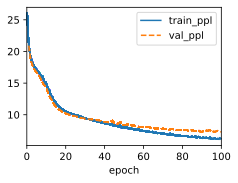

In [12]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNNScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLMScratch(rnn, vocab_size=len(data.vocab), lr=1)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [13]:
@d2l.add_to_class(RNNLMScratch)  # @save
def predict(self, prefix, num_preds, vocab, device=None):
    state, outputs = None, [vocab[prefix[0]]]
    for i in range(len(prefix) + num_preds - 1):
        X = torch.tensor([[outputs[-1]]], device=device)
        embs = self.one_hot(X)
        rnn_outputs, state = self.rnn(embs, state)
        if i < len(prefix) - 1:  # Warm-up period
            outputs.append(vocab[prefix[i + 1]])
        else:  # Predict num_preds steps
            Y = self.output_layer(rnn_outputs)
            outputs.append(int(Y.argmax(axis=2).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

这段代码将`predict`方法添加到`RNNLMScratch`类中。这个方法用于根据用户提供的前缀生成文本序列。它接收以下参数：

- `prefix`：用户提供的前缀，是一个字符串。
- `num_preds`：在前缀之后要生成的字符数。
- `vocab`：词汇表，用于将标记（字符）转换为索引，以及将索引转换回标记。
- `device`：用于执行计算的设备（可选），例如CPU或GPU。

方法的逻辑如下：

1. 初始化隐藏状态`state`为`None`，并将前缀的第一个字符添加到`outputs`列表中。

2. 对于`len(prefix) + num_preds - 1`次迭代，执行以下操作：
   - 将`outputs`中的最后一个元素作为输入`X`（一个形状为`(1, 1)`的张量）。
   - 将`X`转换为one-hot编码`embs`。
   - 将`embs`和`state`输入到RNN中，得到输出`rnn_outputs`和新的隐藏状态`state`。
   - 如果当前迭代次数小于`len(prefix) - 1`，说明我们处于预热期。在这个阶段，我们将前缀的下一个字符添加到`outputs`中。
   - 否则，我们处于预测阶段。我们将`rnn_outputs`输入到输出层，得到预测结果`Y`。然后，我们将`Y`中概率最大的索引添加到`outputs`中。

3. 当所有迭代完成后，我们使用词汇表将`outputs`中的索引转换回标记（字符），并将它们连接成一个字符串。这个字符串就是我们生成的文本序列。

总之，这个`predict`方法实现了根据用户提供的前缀生成文本序列的功能。它首先进行预热期，然后开始生成后续字符，并将生成的字符作为下一个时间步的输入。最后，将生成的序列作为字符串返回。

In [14]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has and the the the the'

一旦学习了一个语言模型，我们不仅可以用它预测下一个标记，还可以继续预测每个后续标记，将之前预测的标记视为输入中的下一个标记。有时我们只想生成文本，就像从文档的开头开始一样。然而，通常将语言模型条件化在用户提供的前缀上是很有用的。例如，如果我们正在为搜索引擎开发自动完成功能或协助用户编写电子邮件，我们会想要输入他们迄今为止编写的内容（前缀），然后生成一个可能的后续内容。

以下`predict`方法在摄取用户提供的前缀后，一次生成一个字符的后续内容。当循环遍历前缀中的字符时，我们将隐藏状态传递到下一个时间步，但不生成任何输出。这被称为预热期。摄取前缀后，我们现在准备开始发射后续字符，每个字符将作为下一个时间步的输入反馈到模型中。

简而言之，这个过程包括以下步骤：

1. 将用户提供的前缀输入到模型中，逐个字符进行预测。在这个阶段，我们不生成任何输出，而是将隐藏状态传递到下一个时间步。这个阶段称为预热期。

2. 在摄取前缀后，我们开始生成后续字符。对于每个生成的字符，我们将其作为下一个时间步的输入，并继续预测。

通过这种方式，我们可以基于用户提供的前缀生成合理的文本序列，这对于自动完成、智能回复等应用场景非常有用。

1. Does the implemented language model predict the next token based on all the past tokens up to the very first token in The Time Machine?

2. Which hyperparameter controls the length of history used for prediction?

3. Show that one-hot encoding is equivalent to picking a different embedding for each object.

4. Adjust the hyperparameters (e.g., number of epochs, number of hidden units, number of time steps in a minibatch, and learning rate) to improve the perplexity. How low can you go while sticking with this simple architecture?

5. Replace one-hot encoding with learnable embeddings. Does this lead to better performance?

6. Conduct an experiment to determine how well this language model trained on The Time Machine works on other books by H. G. Wells, e.g., The War of the Worlds.

7. Conduct another experiment to evaluate the perplexity of this model on books written by other authors.

8. Modify the prediction method so as to use sampling rather than picking the most likely next character.

    . What happens?

    Bias the model towards more likely outputs, e.g., by sampling from 
    for 
    .

9. Run the code in this section without clipping the gradient. What happens?

10. Replace the activation function used in this section with ReLU and repeat the experiments in this section. Do we still need gradient clipping? Why?

1. 是的，实现的语言模型基于《时间机器》中从第一个标记到当前标记的所有过去标记来预测下一个标记。

2. 控制用于预测的历史长度的超参数是RNN中的隐藏状态数量。隐藏状态充当模型的记忆，可以捕捉一定长度的历史信息。

3. 对于独热编码，每个对象都有一个唯一的向量，其中仅有一个元素为1，其余元素为0。这等效于为每个对象选择一个不同的嵌入，因为独热向量可以通过与嵌入矩阵相乘来选择相应的嵌入行。

4. 调整超参数（例如，迭代次数、隐藏单元数、小批量中的时间步数和学习率）以改进困惑度。在坚持使用这个简单架构的情况下，你可以将困惑度降低到多少？

   这个问题需要实际尝试和调整超参数来找到最佳设置。可能的一些建议是增加隐藏单元数、减少学习率和增加迭代次数。

5. 使用可学习的嵌入替换独热编码是否会带来更好的性能？

   是的，使用可学习的嵌入通常会带来更好的性能，因为嵌入可以捕捉词汇之间的语义关系，而独热编码不能。

6. 进行实验，了解在H.G.威尔斯的其他书籍（如《世界大战》）上训练的这种语言模型的效果如何。

   这个问题需要实际收集数据并进行实验。预期的结果是，由于作者和主题相似，该模型可能在H.G.威尔斯的其他书籍上表现良好。

7. 进行另一个实验，评估该模型在其他作者的书籍上的困惑度。

   这个问题同样需要实际收集数据并进行实验。预期的结果是，对于与训练数据相似的文本，模型的性能可能较好；对于与训练数据相差较大的文本，性能可能较差。

8. 修改预测方法，使用采样而不是选择最可能的下一个字符。会发生什么？

   使用采样而不是选择最可能的字符会导致生成的文本更具多样性和随机性。这可能使得生成的文本更富有创意，但有时可能会导致不太相关或不一致的生成。

9. 将模型偏向于更可能的输出，例如，通过从q(x)中进行采样，其中q(x) = p(x)^α，α < 1。

   通过这种方法，我们可以在保持一定多样性的同时，使生成的文本更倾向于高概率的输出。这可能导致生成的文本更加相关和一致，但仍具有一定的随机性。

10. 在不裁剪梯度的情况下运行本节的代码。会发生什么？

    不裁剪梯度可能会导致梯度爆炸问题，从而使训练变得不稳定或发散。这可能导致模型无法收敛到一个合适的解，或者损失函数出现剧烈波动。

11. 将本节使用的激活函数替换为ReLU，然后重复本节的实验。我们还需要梯度裁剪吗？为什么？

将激活函数替换为ReLU后，我们可能仍然需要梯度裁剪。虽然ReLU激活函数在某些情况下可能有助于缓解梯度消失问题，但它并不能解决梯度爆炸问题。特别是在循环神经网络（RNN）中，梯度可能在时间步之间累积，导致梯度值变得非常大。因此，在使用ReLU激活函数的RNN中，梯度裁剪仍然是一种有用的技巧，可以防止梯度爆炸并提高训练的稳定性。